In [27]:
import json
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import DistanceMetric 

In [18]:
def ouvrir_fichier(chemin, lines = False):
    f = open(chemin, encoding="utf-8")### ajouter dans les paramètres encoding="utf-8" sous windows
    if lines ==True:
        sortie = f.readlines()#liste de chaines (lignes dans le fichier)
    else:
        sortie = f.read()#une seule chaîne
    f.close()
    return sortie


def write_json(path, contenu):
    w = codecs.open(path, "w", encoding="utf-8")
    w.write(json.dumps(contenu, indent = 2, ensure_ascii=False))
    w.close()
    

def func_dist(liste, dist_name):
    '''
    Fonction qui permet d'obtenir la distance les éléments d'une liste vectorisée par le CountVectorizer
    puis de la transformer en array
    et calculer la distance
    '''
    dist = DistanceMetric.get_metric(dist_name)
    V = CountVectorizer() #Initialisation du Vectorizer
    X = V.fit_transform(liste).toarray() #Vectorization
    d = dist.pairwise(X)
    return d


# Distance et classification 
Morgann Sabatier, Mustapha Lazreg

--------
**__Sommaire__**


[1. Formatage des données](#section_1)  
[2. Comparer une question à plusieurs réponses](#section_2)  
[3. Comparer chaque question à toutes les réponses](#section_3)  
[4. Analyse des résultats](#section_4)


#### Données

Il s'agit d'un jeu de données au format tsv composé de 1000 questions réponses.
Le fichier est composé de trois colonnes : l'id, la question, la réponse correspondante. 
Le format de données est à prendre en compte afin de garantir une exploitation des données performante. 

Nous avons également choisi d'explorer les données de manière simple.

#### Méthode

- Formatage des données
- Vectorisation question + réponses
- Calcul de distance
- Extraction distance question q VS réponses n0 à n 

#### Objectif
Association Question/réponse via une vectorisation et un rapprochement des deux entités. 


## 1. Formatage données <a class="anchor" id="section_1"></a>

#### Utilisez une mesure de similarité et regardez si vous faites les bonnes associations

In [11]:
data=pd.read_csv('ubuntu_sample.tsv',sep='\t', names=['ID', 'Question', 'Réponse'])
data.head()

,ID,Question,Réponse
0,1,how to get the `` your battery is broken '' me...,"everytime i turn on my computer , i see a mess..."
1,3,how can i set the software center to install s...,how can i set the software center to allow non...
2,5,what are some alternatives to upgrading withou...,what are some alternatives to upgrading withou...
3,6,how to set up a headless server ?,i have a ubuntu development server at work . i...
4,7,how do i run a successful ubuntu hour ?,i 'm taking my be-stickered laptop to a coffee...


In [12]:
data.shape

(1000, 3)

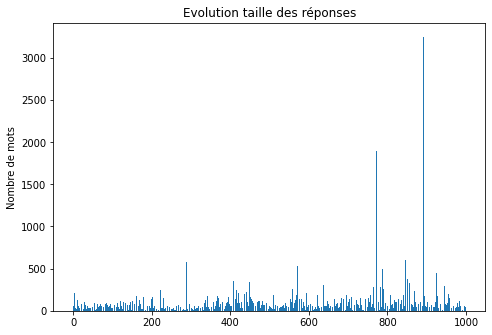

In [13]:
longRep = []
x=[]
for item in data["Réponse"]:
    txt = item.split(" ")
    longRep.append(len(txt))
    
for item in data["ID"]:
    x.append(item)


longQ = []
for item in data["Question"]:
    txt = item.split(" ")
    longQ.append(len(txt))
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(0, 1000)),longRep)
plt.ylabel("Nombre de mots")
plt.title("Evolution taille des réponses")
plt.show()

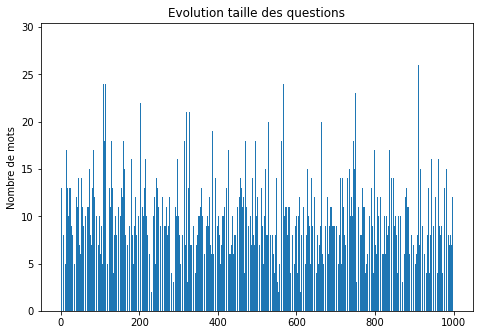

In [14]:
longQ = []
for item in data["Question"]:
    txt = item.split(" ")
    longQ.append(len(txt))
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(0, 1000)),longQ)
plt.ylabel("Nombre de mots")
plt.title("Evolution taille des questions")
plt.show()

On remarque que la taille des questions est homogène contrairement à la taille des réponses. 
On peut s'attendre à ce que les réponses les plus longues soient éliminées à chaque fois étant donné que de par leur forme, la distance s'agrandira par rapport aux question qui ne font qu'une vingtaine de mots tout au plus. 

Envisager de supprimer les réponses les plus longues ? 

## 2. Comparer une question à plusieurs réponses <a class="anchor" id="section_2"></a>

Afin de faciliter l'élaboration de notre pipeline, nous avons segmenter le traitement. 

Nous sommes partis du principe que nous devions comparer la première question à toutes les autres (ici un échantillon de 5 afin d'être sûrs de bien comprendre ce qu'on manipule).

In [15]:
# Comparer une question VS toutes les autres 

# Vectorisation 

### 2.1 Création de notre liste

In [31]:
len(data)
j = 0
list_q1_rto5 = []
list_q1_rto5.append(data.iloc[0][1])
for i in range(0,20):
    str_question = data.iloc[j][1]
    str_reponse = data.iloc[i][2]
    list_q1_rto5.append(str_reponse)

print(len(list_q1_rto5))

21


### 2.3 Calcul distance avec une distance

Vectorization + calcul distance

In [32]:
func_dist(list_q1_rto5, "euclidean")

array([[ 0.        ,  5.38516481,  8.30662386, 10.04987562, 19.6977156 ,
         9.2736185 ,  9.59166305,  6.32455532,  5.74456265,  4.69041576,
        42.44997055,  9.59166305, 16.34013464,  7.93725393,  8.24621125,
         6.78232998,  6.        ,  8.71779789, 13.67479433, 11.13552873,
         8.94427191],
       [ 5.38516481,  0.        , 10.09950494, 11.48912529, 20.46948949,
         9.94987437, 10.90871211,  7.81024968,  7.61577311,  6.70820393,
        42.83689998, 10.72380529, 17.08800749,  9.79795897,  9.74679434,
         8.66025404,  7.81024968,  8.77496439, 14.83239697, 12.52996409,
        10.24695077],
       [ 8.30662386, 10.09950494,  0.        , 11.3137085 , 17.80449381,
        11.18033989, 11.35781669,  9.74679434,  9.16515139,  9.        ,
        42.36744033, 11.09053651, 15.55634919,  9.16515139, 10.72380529,
         9.32737905,  9.64365076, 11.87434209, 12.88409873, 10.72380529,
        10.24695077],
       [10.04987562, 11.48912529, 11.3137085 ,  0.        

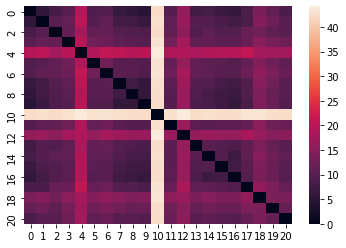

In [33]:
import seaborn as sns
ax = sns.heatmap(func_dist(list_q1_rto5, "euclidean"))

On se rend compte avec la heatmap que la réponse 10 est juste plus proche de TOUS les autres éléments.
Pas sépecifiquement de la question 0. (ça fait des quadrillages)

### 2.4 Extraire le minimum 

Nous avons trouvé deux méthodes pour extraire le minimum. 

In [277]:
L = []
dic_min = {} #index:valeur

min_i = 1000
min_id = 1000
#On évite d'itérer sur la comparaison Q1-Q1 pour passer directement à Q1-Q2
for index in range(1, len(d[0])): # On itère à partir du deuxième élement 
    i = d[0][index]
    if min_i > i:
        min_i = i
        min_id = index  

9 25.0


In [25]:
for i in d:
    for valeur in i:
        np.delete(valeur, [0])
        d2 = np.sort(d, 1)
for mini in d2:
    mindist = mini[1]
    print(mindist)
    #resultat_final = {"nom":dist_name,"index":index, "question":q, "distance minimale":mini[1]}

5.385164807134504
5.385164807134504
8.306623862918075
10.04987562112089
17.804493814764857
9.273618495495704


## 3. Chaque question comparée à toutes les réponses <a class="anchor" id="section_3"></a>

In [431]:
########### ATTENTION J'AI LAISSE n=1000, NE PAS LANCER LA CELLULE CA RISQUE D'ÊTRE LONG ##############

n = len(data) #Nombre de réponse et questions à comparer si corpus complet n = len(data)
list_simi = ["jaccard", "euclidean", "canberra"]
score = {}
dic_word_dist = {}

# On va mesure avec différentes techniques de distances
for dist_name in list_simi :
    dist = DistanceMetric.get_metric(dist_name)
    
    dic_rep = {}
    int_bonrep = 0
    score.setdefault(dist_name, 0)
    print("#"*10)
    print(dist_name.upper())

    for j in range(0,n): #on itère sur n questions qui seront comparée indépendamment à chaque réponse
        list_q1_r = [] 
        str_question = data.iloc[j]["Question"]
        print("Ligne n° {} \t Question ID: {} ".format(j,data.iloc[j]["ID"]))
        list_q1_r.append(str_question) #On Compare 1 question à n réponses
        #list_q1_r -> [Qn, R1, R2, R3 ...] on a donc list_q1_r[0] = Ma question N
        
        for i in range(0,n): # i = index réponse 
            str_reponse = data.iloc[i]["Réponse"]
            list_q1_r.append(str_reponse)
        
        #### VECTORIZATION ###
        V = CountVectorizer() #Initialisation du Vectorizer
        X = V.fit_transform(list_q1_r).toarray() #Vectorization
        d = dist.pairwise(X) # Mesure de similarité selon dist_name
        
        #### DETERMINER DISTANCE MINIMUM ####
        # Les min sont très hauts pour garantir qu'ils seront actualisés 
        min_i = 99
        min_id = 99
        
        #On évite d'itérer sur la comparaison Q1-Q1 pour passer directement à Q1-Q2
        for index in range(1, len(d[0])): # On itère à partir du deuxième élement 
            dic_min = {}
            list_min = []
            ind = d[0][index]
            
            #On cherche le minimum
            if min_i > ind:
                min_i = ind
                min_id = index
        print("Pour la question {}, la réponse la plus proche est la réponse {}.".format(data.iloc[j]["ID"], data.iloc[min_id-1]["ID"]))
        print("Min ligne : {} \t Min ID : {} \t Min valeur : {}".format(min_id, data.iloc[min_id-1]["ID"], min_i))
        
        list_mini = [int(data.iloc[min_id-1]["ID"]), float(min_i)] #min-id-1 car les réponses sont décalées de 1 par rapport à l'odre du data set
        # Vu que je travaille avec Pandas, j'avais un problème de format car de type pandas.float, j'ai converti du coup. 
        
        dic_rep[str(data.iloc[j]["ID"])]=list_mini
        if data.iloc[j]["ID"] == data.iloc[min_id-1]["ID"]:
            int_bonrep+=1
            print("Bonne réponse !")
        print("-"*40)

    score[dist_name]=int_bonrep/n
    dic_word_dist[dist_name]=dic_rep

##########
JACCARD
Ligne n° 0 	 Question ID: 1 
Pour la question 1, la réponse la plus proche est la réponse 1.
Min ligne : 1 	 Min ID : 1 	 Min valeur : 0.7
Bonne réponse !
----------------------------------------
Ligne n° 1 	 Question ID: 3 
Pour la question 3, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.75
----------------------------------------
Ligne n° 2 	 Question ID: 5 
Pour la question 5, la réponse la plus proche est la réponse 2946.
Min ligne : 737 	 Min ID : 2946 	 Min valeur : 0.6666666666666666
----------------------------------------
Ligne n° 3 	 Question ID: 6 
Pour la question 6, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.8333333333333334
----------------------------------------
Ligne n° 4 	 Question ID: 7 
Pour la question 7, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 0.7
----------------------------------------
Ligne 

Pour la question 108, la réponse la plus proche est la réponse 108.
Min ligne : 42 	 Min ID : 108 	 Min valeur : 0.7857142857142857
Bonne réponse !
----------------------------------------
Ligne n° 42 	 Question ID: 111 
Pour la question 111, la réponse la plus proche est la réponse 773.
Min ligne : 211 	 Min ID : 773 	 Min valeur : 0.75
----------------------------------------
Ligne n° 43 	 Question ID: 112 
Pour la question 112, la réponse la plus proche est la réponse 198.
Min ligne : 62 	 Min ID : 198 	 Min valeur : 0.7692307692307693
----------------------------------------
Ligne n° 44 	 Question ID: 116 
Pour la question 116, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 0.7857142857142857
----------------------------------------
Ligne n° 45 	 Question ID: 120 
Pour la question 120, la réponse la plus proche est la réponse 3586.
Min ligne : 904 	 Min ID : 3586 	 Min valeur : 0.7368421052631579
---------------------------------------

Pour la question 277, la réponse la plus proche est la réponse 798.
Min ligne : 218 	 Min ID : 798 	 Min valeur : 0.7777777777777778
----------------------------------------
Ligne n° 82 	 Question ID: 278 
Pour la question 278, la réponse la plus proche est la réponse 2014.
Min ligne : 494 	 Min ID : 2014 	 Min valeur : 0.8125
----------------------------------------
Ligne n° 83 	 Question ID: 279 
Pour la question 279, la réponse la plus proche est la réponse 2206.
Min ligne : 543 	 Min ID : 2206 	 Min valeur : 0.8571428571428571
----------------------------------------
Ligne n° 84 	 Question ID: 280 
Pour la question 280, la réponse la plus proche est la réponse 3586.
Min ligne : 904 	 Min ID : 3586 	 Min valeur : 0.8571428571428571
----------------------------------------
Ligne n° 85 	 Question ID: 282 
Pour la question 282, la réponse la plus proche est la réponse 1294.
Min ligne : 333 	 Min ID : 1294 	 Min valeur : 0.8947368421052632
----------------------------------------
Ligne 

Pour la question 442, la réponse la plus proche est la réponse 249.
Min ligne : 76 	 Min ID : 249 	 Min valeur : 0.7777777777777778
----------------------------------------
Ligne n° 122 	 Question ID: 443 
Pour la question 443, la réponse la plus proche est la réponse 2014.
Min ligne : 494 	 Min ID : 2014 	 Min valeur : 0.75
----------------------------------------
Ligne n° 123 	 Question ID: 447 
Pour la question 447, la réponse la plus proche est la réponse 447.
Min ligne : 124 	 Min ID : 447 	 Min valeur : 0.6944444444444444
Bonne réponse !
----------------------------------------
Ligne n° 124 	 Question ID: 454 
Pour la question 454, la réponse la plus proche est la réponse 249.
Min ligne : 76 	 Min ID : 249 	 Min valeur : 0.7222222222222222
----------------------------------------
Ligne n° 125 	 Question ID: 456 
Pour la question 456, la réponse la plus proche est la réponse 456.
Min ligne : 126 	 Min ID : 456 	 Min valeur : 0.5
Bonne réponse !
------------------------------------

Pour la question 613, la réponse la plus proche est la réponse 2281.
Min ligne : 565 	 Min ID : 2281 	 Min valeur : 0.8709677419354839
----------------------------------------
Ligne n° 162 	 Question ID: 615 
Pour la question 615, la réponse la plus proche est la réponse 2953.
Min ligne : 740 	 Min ID : 2953 	 Min valeur : 0.7894736842105263
----------------------------------------
Ligne n° 163 	 Question ID: 617 
Pour la question 617, la réponse la plus proche est la réponse 2130.
Min ligne : 524 	 Min ID : 2130 	 Min valeur : 0.85
----------------------------------------
Ligne n° 164 	 Question ID: 620 
Pour la question 620, la réponse la plus proche est la réponse 620.
Min ligne : 165 	 Min ID : 620 	 Min valeur : 0.8923076923076924
Bonne réponse !
----------------------------------------
Ligne n° 165 	 Question ID: 622 
Pour la question 622, la réponse la plus proche est la réponse 1649.
Min ligne : 407 	 Min ID : 1649 	 Min valeur : 0.7857142857142857
-----------------------------

Pour la question 745, la réponse la plus proche est la réponse 1907.
Min ligne : 471 	 Min ID : 1907 	 Min valeur : 0.9230769230769231
----------------------------------------
Ligne n° 202 	 Question ID: 748 
Pour la question 748, la réponse la plus proche est la réponse 83.
Min ligne : 34 	 Min ID : 83 	 Min valeur : 0.8181818181818182
----------------------------------------
Ligne n° 203 	 Question ID: 754 
Pour la question 754, la réponse la plus proche est la réponse 754.
Min ligne : 204 	 Min ID : 754 	 Min valeur : 0.7543859649122807
Bonne réponse !
----------------------------------------
Ligne n° 204 	 Question ID: 756 
Pour la question 756, la réponse la plus proche est la réponse 756.
Min ligne : 205 	 Min ID : 756 	 Min valeur : 0.5454545454545454
Bonne réponse !
----------------------------------------
Ligne n° 205 	 Question ID: 760 
Pour la question 760, la réponse la plus proche est la réponse 2007.
Min ligne : 492 	 Min ID : 2007 	 Min valeur : 0.8947368421052632
------

Pour la question 906, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 0.8333333333333334
----------------------------------------
Ligne n° 241 	 Question ID: 908 
Pour la question 908, la réponse la plus proche est la réponse 908.
Min ligne : 242 	 Min ID : 908 	 Min valeur : 0.8275862068965517
Bonne réponse !
----------------------------------------
Ligne n° 242 	 Question ID: 915 
Pour la question 915, la réponse la plus proche est la réponse 915.
Min ligne : 243 	 Min ID : 915 	 Min valeur : 0.75
Bonne réponse !
----------------------------------------
Ligne n° 243 	 Question ID: 916 
Pour la question 916, la réponse la plus proche est la réponse 14.
Min ligne : 9 	 Min ID : 14 	 Min valeur : 0.9047619047619048
----------------------------------------
Ligne n° 244 	 Question ID: 933 
Pour la question 933, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 0.5833333333333334
---------------------

Pour la question 1081, la réponse la plus proche est la réponse 863.
Min ligne : 235 	 Min ID : 863 	 Min valeur : 0.7857142857142857
----------------------------------------
Ligne n° 281 	 Question ID: 1082 
Pour la question 1082, la réponse la plus proche est la réponse 1082.
Min ligne : 282 	 Min ID : 1082 	 Min valeur : 0.4375
Bonne réponse !
----------------------------------------
Ligne n° 282 	 Question ID: 1083 
Pour la question 1083, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 0.7142857142857143
----------------------------------------
Ligne n° 283 	 Question ID: 1084 
Pour la question 1084, la réponse la plus proche est la réponse 2839.
Min ligne : 712 	 Min ID : 2839 	 Min valeur : 0.7272727272727273
----------------------------------------
Ligne n° 284 	 Question ID: 1086 
Pour la question 1086, la réponse la plus proche est la réponse 1086.
Min ligne : 285 	 Min ID : 1086 	 Min valeur : 0.7894736842105263
Bonne réponse !
--

Pour la question 1245, la réponse la plus proche est la réponse 1245.
Min ligne : 320 	 Min ID : 1245 	 Min valeur : 0.8787878787878788
Bonne réponse !
----------------------------------------
Ligne n° 320 	 Question ID: 1247 
Pour la question 1247, la réponse la plus proche est la réponse 1247.
Min ligne : 321 	 Min ID : 1247 	 Min valeur : 0.15384615384615385
Bonne réponse !
----------------------------------------
Ligne n° 321 	 Question ID: 1263 
Pour la question 1263, la réponse la plus proche est la réponse 3116.
Min ligne : 781 	 Min ID : 3116 	 Min valeur : 0.8461538461538461
----------------------------------------
Ligne n° 322 	 Question ID: 1266 
Pour la question 1266, la réponse la plus proche est la réponse 14.
Min ligne : 9 	 Min ID : 14 	 Min valeur : 0.7777777777777778
----------------------------------------
Ligne n° 323 	 Question ID: 1269 
Pour la question 1269, la réponse la plus proche est la réponse 2624.
Min ligne : 661 	 Min ID : 2624 	 Min valeur : 0.9375
-----

Pour la question 1387, la réponse la plus proche est la réponse 894.
Min ligne : 239 	 Min ID : 894 	 Min valeur : 0.8518518518518519
----------------------------------------
Ligne n° 359 	 Question ID: 1392 
Pour la question 1392, la réponse la plus proche est la réponse 249.
Min ligne : 76 	 Min ID : 249 	 Min valeur : 0.7619047619047619
----------------------------------------
Ligne n° 360 	 Question ID: 1400 
Pour la question 1400, la réponse la plus proche est la réponse 2839.
Min ligne : 712 	 Min ID : 2839 	 Min valeur : 0.75
----------------------------------------
Ligne n° 361 	 Question ID: 1403 
Pour la question 1403, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 0.7692307692307693
----------------------------------------
Ligne n° 362 	 Question ID: 1414 
Pour la question 1414, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.8181818181818182
----------------------------------------


Pour la question 1618, la réponse la plus proche est la réponse 2444.
Min ligne : 611 	 Min ID : 2444 	 Min valeur : 0.8823529411764706
----------------------------------------
Ligne n° 399 	 Question ID: 1620 
Pour la question 1620, la réponse la plus proche est la réponse 3130.
Min ligne : 784 	 Min ID : 3130 	 Min valeur : 0.8333333333333334
----------------------------------------
Ligne n° 400 	 Question ID: 1624 
Pour la question 1624, la réponse la plus proche est la réponse 784.
Min ligne : 215 	 Min ID : 784 	 Min valeur : 0.9230769230769231
----------------------------------------
Ligne n° 401 	 Question ID: 1626 
Pour la question 1626, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 0.7647058823529411
----------------------------------------
Ligne n° 402 	 Question ID: 1629 
Pour la question 1629, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.8571428571428571
------------------------

Pour la question 1772, la réponse la plus proche est la réponse 2014.
Min ligne : 494 	 Min ID : 2014 	 Min valeur : 0.7
----------------------------------------
Ligne n° 439 	 Question ID: 1780 
Pour la question 1780, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 0.8
----------------------------------------
Ligne n° 440 	 Question ID: 1784 
Pour la question 1784, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 0.5
Bonne réponse !
----------------------------------------
Ligne n° 441 	 Question ID: 1786 
Pour la question 1786, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 0.7857142857142857
----------------------------------------
Ligne n° 442 	 Question ID: 1788 
Pour la question 1788, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 0.9
----------------------------------------
Ligne n° 443 	 Question I

Pour la question 1938, la réponse la plus proche est la réponse 690.
Min ligne : 185 	 Min ID : 690 	 Min valeur : 0.8
----------------------------------------
Ligne n° 479 	 Question ID: 1942 
Pour la question 1942, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.7142857142857143
----------------------------------------
Ligne n° 480 	 Question ID: 1943 
Pour la question 1943, la réponse la plus proche est la réponse 1943.
Min ligne : 481 	 Min ID : 1943 	 Min valeur : 0.7317073170731707
Bonne réponse !
----------------------------------------
Ligne n° 481 	 Question ID: 1954 
Pour la question 1954, la réponse la plus proche est la réponse 2837.
Min ligne : 711 	 Min ID : 2837 	 Min valeur : 0.7619047619047619
----------------------------------------
Ligne n° 482 	 Question ID: 1956 
Pour la question 1956, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 0.8181818181818182
-------------------------

Pour la question 2110, la réponse la plus proche est la réponse 1649.
Min ligne : 407 	 Min ID : 1649 	 Min valeur : 0.8125
----------------------------------------
Ligne n° 519 	 Question ID: 2115 
Pour la question 2115, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 0.8181818181818182
----------------------------------------
Ligne n° 520 	 Question ID: 2118 
Pour la question 2118, la réponse la plus proche est la réponse 2014.
Min ligne : 494 	 Min ID : 2014 	 Min valeur : 0.7333333333333333
----------------------------------------
Ligne n° 521 	 Question ID: 2126 
Pour la question 2126, la réponse la plus proche est la réponse 798.
Min ligne : 218 	 Min ID : 798 	 Min valeur : 0.7894736842105263
----------------------------------------
Ligne n° 522 	 Question ID: 2127 
Pour la question 2127, la réponse la plus proche est la réponse 2637.
Min ligne : 665 	 Min ID : 2637 	 Min valeur : 0.782608695652174
-----------------------------------

Pour la question 2261, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.8571428571428571
----------------------------------------
Ligne n° 559 	 Question ID: 2263 
Pour la question 2263, la réponse la plus proche est la réponse 3956.
Min ligne : 992 	 Min ID : 3956 	 Min valeur : 0.8
----------------------------------------
Ligne n° 560 	 Question ID: 2266 
Pour la question 2266, la réponse la plus proche est la réponse 2266.
Min ligne : 561 	 Min ID : 2266 	 Min valeur : 0.723404255319149
Bonne réponse !
----------------------------------------
Ligne n° 561 	 Question ID: 2271 
Pour la question 2271, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.8333333333333334
----------------------------------------
Ligne n° 562 	 Question ID: 2276 
Pour la question 2276, la réponse la plus proche est la réponse 249.
Min ligne : 76 	 Min ID : 249 	 Min valeur : 0.8
----------------------------------------
L

Pour la question 2399, la réponse la plus proche est la réponse 2399.
Min ligne : 599 	 Min ID : 2399 	 Min valeur : 0.8378378378378378
Bonne réponse !
----------------------------------------
Ligne n° 599 	 Question ID: 2401 
Pour la question 2401, la réponse la plus proche est la réponse 3130.
Min ligne : 784 	 Min ID : 3130 	 Min valeur : 0.8148148148148148
----------------------------------------
Ligne n° 600 	 Question ID: 2405 
Pour la question 2405, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 0.8
----------------------------------------
Ligne n° 601 	 Question ID: 2408 
Pour la question 2408, la réponse la plus proche est la réponse 3804.
Min ligne : 955 	 Min ID : 3804 	 Min valeur : 0.8235294117647058
----------------------------------------
Ligne n° 602 	 Question ID: 2411 
Pour la question 2411, la réponse la plus proche est la réponse 1540.
Min ligne : 386 	 Min ID : 1540 	 Min valeur : 0.7368421052631579
-------------------

Pour la question 2547, la réponse la plus proche est la réponse 3116.
Min ligne : 781 	 Min ID : 3116 	 Min valeur : 0.8
----------------------------------------
Ligne n° 639 	 Question ID: 2554 
Pour la question 2554, la réponse la plus proche est la réponse 3116.
Min ligne : 781 	 Min ID : 3116 	 Min valeur : 0.8125
----------------------------------------
Ligne n° 640 	 Question ID: 2557 
Pour la question 2557, la réponse la plus proche est la réponse 2557.
Min ligne : 641 	 Min ID : 2557 	 Min valeur : 0.9032258064516129
Bonne réponse !
----------------------------------------
Ligne n° 641 	 Question ID: 2558 
Pour la question 2558, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 0.8181818181818182
----------------------------------------
Ligne n° 642 	 Question ID: 2567 
Pour la question 2567, la réponse la plus proche est la réponse 1780.
Min ligne : 440 	 Min ID : 1780 	 Min valeur : 0.8275862068965517
-------------------------------

Pour la question 2695, la réponse la plus proche est la réponse 2695.
Min ligne : 678 	 Min ID : 2695 	 Min valeur : 0.7419354838709677
Bonne réponse !
----------------------------------------
Ligne n° 678 	 Question ID: 2700 
Pour la question 2700, la réponse la plus proche est la réponse 2700.
Min ligne : 679 	 Min ID : 2700 	 Min valeur : 0.8333333333333334
Bonne réponse !
----------------------------------------
Ligne n° 679 	 Question ID: 2707 
Pour la question 2707, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 0.8571428571428571
----------------------------------------
Ligne n° 680 	 Question ID: 2708 
Pour la question 2708, la réponse la plus proche est la réponse 1352.
Min ligne : 351 	 Min ID : 1352 	 Min valeur : 0.8181818181818182
----------------------------------------
Ligne n° 681 	 Question ID: 2710 
Pour la question 2710, la réponse la plus proche est la réponse 2710.
Min ligne : 682 	 Min ID : 2710 	 Min valeur : 0.7586206

Pour la question 2857, la réponse la plus proche est la réponse 1076.
Min ligne : 279 	 Min ID : 1076 	 Min valeur : 0.8888888888888888
----------------------------------------
Ligne n° 717 	 Question ID: 2866 
Pour la question 2866, la réponse la plus proche est la réponse 1572.
Min ligne : 392 	 Min ID : 1572 	 Min valeur : 0.8235294117647058
----------------------------------------
Ligne n° 718 	 Question ID: 2872 
Pour la question 2872, la réponse la plus proche est la réponse 2946.
Min ligne : 737 	 Min ID : 2946 	 Min valeur : 0.7777777777777778
----------------------------------------
Ligne n° 719 	 Question ID: 2877 
Pour la question 2877, la réponse la plus proche est la réponse 2964.
Min ligne : 742 	 Min ID : 2964 	 Min valeur : 0.8421052631578947
----------------------------------------
Ligne n° 720 	 Question ID: 2884 
Pour la question 2884, la réponse la plus proche est la réponse 2884.
Min ligne : 721 	 Min ID : 2884 	 Min valeur : 0.0
Bonne réponse !
-------------------

Pour la question 3030, la réponse la plus proche est la réponse 730.
Min ligne : 198 	 Min ID : 730 	 Min valeur : 0.8275862068965517
----------------------------------------
Ligne n° 756 	 Question ID: 3031 
Pour la question 3031, la réponse la plus proche est la réponse 2606.
Min ligne : 656 	 Min ID : 2606 	 Min valeur : 0.8780487804878049
----------------------------------------
Ligne n° 757 	 Question ID: 3032 
Pour la question 3032, la réponse la plus proche est la réponse 1090.
Min ligne : 287 	 Min ID : 1090 	 Min valeur : 0.75
----------------------------------------
Ligne n° 758 	 Question ID: 3036 
Pour la question 3036, la réponse la plus proche est la réponse 3036.
Min ligne : 759 	 Min ID : 3036 	 Min valeur : 0.6538461538461539
Bonne réponse !
----------------------------------------
Ligne n° 759 	 Question ID: 3037 
Pour la question 3037, la réponse la plus proche est la réponse 417.
Min ligne : 117 	 Min ID : 417 	 Min valeur : 0.8
-------------------------------------

Pour la question 3178, la réponse la plus proche est la réponse 417.
Min ligne : 117 	 Min ID : 417 	 Min valeur : 0.8181818181818182
----------------------------------------
Ligne n° 796 	 Question ID: 3179 
Pour la question 3179, la réponse la plus proche est la réponse 1792.
Min ligne : 446 	 Min ID : 1792 	 Min valeur : 0.9411764705882353
----------------------------------------
Ligne n° 797 	 Question ID: 3180 
Pour la question 3180, la réponse la plus proche est la réponse 2884.
Min ligne : 721 	 Min ID : 2884 	 Min valeur : 0.8571428571428571
----------------------------------------
Ligne n° 798 	 Question ID: 3182 
Pour la question 3182, la réponse la plus proche est la réponse 1540.
Min ligne : 386 	 Min ID : 1540 	 Min valeur : 0.85
----------------------------------------
Ligne n° 799 	 Question ID: 3189 
Pour la question 3189, la réponse la plus proche est la réponse 3189.
Min ligne : 800 	 Min ID : 3189 	 Min valeur : 0.7105263157894737
Bonne réponse !
--------------------

Pour la question 3359, la réponse la plus proche est la réponse 3359.
Min ligne : 836 	 Min ID : 3359 	 Min valeur : 0.75
Bonne réponse !
----------------------------------------
Ligne n° 836 	 Question ID: 3362 
Pour la question 3362, la réponse la plus proche est la réponse 1294.
Min ligne : 333 	 Min ID : 1294 	 Min valeur : 0.85
----------------------------------------
Ligne n° 837 	 Question ID: 3363 
Pour la question 3363, la réponse la plus proche est la réponse 3363.
Min ligne : 838 	 Min ID : 3363 	 Min valeur : 0.5714285714285714
Bonne réponse !
----------------------------------------
Ligne n° 838 	 Question ID: 3369 
Pour la question 3369, la réponse la plus proche est la réponse 3369.
Min ligne : 839 	 Min ID : 3369 	 Min valeur : 0.7
Bonne réponse !
----------------------------------------
Ligne n° 839 	 Question ID: 3372 
Pour la question 3372, la réponse la plus proche est la réponse 3956.
Min ligne : 992 	 Min ID : 3956 	 Min valeur : 0.8571428571428571
---------------

Pour la question 3484, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 0.8333333333333334
----------------------------------------
Ligne n° 875 	 Question ID: 3489 
Pour la question 3489, la réponse la plus proche est la réponse 3489.
Min ligne : 876 	 Min ID : 3489 	 Min valeur : 0.7666666666666667
Bonne réponse !
----------------------------------------
Ligne n° 876 	 Question ID: 3497 
Pour la question 3497, la réponse la plus proche est la réponse 2842.
Min ligne : 714 	 Min ID : 2842 	 Min valeur : 0.7692307692307693
----------------------------------------
Ligne n° 877 	 Question ID: 3498 
Pour la question 3498, la réponse la plus proche est la réponse 2461.
Min ligne : 619 	 Min ID : 2461 	 Min valeur : 0.9473684210526315
----------------------------------------
Ligne n° 878 	 Question ID: 3502 
Pour la question 3502, la réponse la plus proche est la réponse 2163.
Min ligne : 535 	 Min ID : 2163 	 Min valeur : 0.9032258064516129
----

Pour la question 3627, la réponse la plus proche est la réponse 1294.
Min ligne : 333 	 Min ID : 1294 	 Min valeur : 0.8333333333333334
----------------------------------------
Ligne n° 914 	 Question ID: 3629 
Pour la question 3629, la réponse la plus proche est la réponse 798.
Min ligne : 218 	 Min ID : 798 	 Min valeur : 0.8
----------------------------------------
Ligne n° 915 	 Question ID: 3632 
Pour la question 3632, la réponse la plus proche est la réponse 1373.
Min ligne : 356 	 Min ID : 1373 	 Min valeur : 0.75
----------------------------------------
Ligne n° 916 	 Question ID: 3642 
Pour la question 3642, la réponse la plus proche est la réponse 3642.
Min ligne : 917 	 Min ID : 3642 	 Min valeur : 0.7931034482758621
Bonne réponse !
----------------------------------------
Ligne n° 917 	 Question ID: 3645 
Pour la question 3645, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 0.8461538461538461
-----------------------------------

Pour la question 3796, la réponse la plus proche est la réponse 2007.
Min ligne : 492 	 Min ID : 2007 	 Min valeur : 0.8
----------------------------------------
Ligne n° 954 	 Question ID: 3804 
Pour la question 3804, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 0.8
----------------------------------------
Ligne n° 955 	 Question ID: 3805 
Pour la question 3805, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.7777777777777778
----------------------------------------
Ligne n° 956 	 Question ID: 3807 
Pour la question 3807, la réponse la plus proche est la réponse 1540.
Min ligne : 386 	 Min ID : 1540 	 Min valeur : 0.7777777777777778
----------------------------------------
Ligne n° 957 	 Question ID: 3815 
Pour la question 3815, la réponse la plus proche est la réponse 3815.
Min ligne : 958 	 Min ID : 3815 	 Min valeur : 0.6666666666666666
Bonne réponse !
------------------------------------

Pour la question 3958, la réponse la plus proche est la réponse 3958.
Min ligne : 993 	 Min ID : 3958 	 Min valeur : 0.8333333333333334
Bonne réponse !
----------------------------------------
Ligne n° 993 	 Question ID: 3981 
Pour la question 3981, la réponse la plus proche est la réponse 690.
Min ligne : 185 	 Min ID : 690 	 Min valeur : 0.8125
----------------------------------------
Ligne n° 994 	 Question ID: 3982 
Pour la question 3982, la réponse la plus proche est la réponse 3549.
Min ligne : 894 	 Min ID : 3549 	 Min valeur : 0.8095238095238095
----------------------------------------
Ligne n° 995 	 Question ID: 3983 
Pour la question 3983, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 0.625
----------------------------------------
Ligne n° 996 	 Question ID: 3998 
Pour la question 3998, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 0.7692307692307693
---------------------------------

Pour la question 83, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 34 	 Question ID: 86 
Pour la question 86, la réponse la plus proche est la réponse 2014.
Min ligne : 494 	 Min ID : 2014 	 Min valeur : 3.0
----------------------------------------
Ligne n° 35 	 Question ID: 93 
Pour la question 93, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.0
----------------------------------------
Ligne n° 36 	 Question ID: 94 
Pour la question 94, la réponse la plus proche est la réponse 773.
Min ligne : 211 	 Min ID : 773 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 37 	 Question ID: 95 
Pour la question 95, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.0
----------------------------------------
Ligne n° 38 	 Question ID: 96 
Pour la question 96, 

Pour la question 248, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 75 	 Question ID: 249 
Pour la question 249, la réponse la plus proche est la réponse 249.
Min ligne : 76 	 Min ID : 249 	 Min valeur : 2.8284271247461903
Bonne réponse !
----------------------------------------
Ligne n° 76 	 Question ID: 253 
Pour la question 253, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 3.0
----------------------------------------
Ligne n° 77 	 Question ID: 256 
Pour la question 256, la réponse la plus proche est la réponse 3956.
Min ligne : 992 	 Min ID : 3956 	 Min valeur : 3.872983346207417
----------------------------------------
Ligne n° 78 	 Question ID: 261 
Pour la question 261, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.0
----------------------------------------
Ligne n° 79 	 Quest

Pour la question 405, la réponse la plus proche est la réponse 863.
Min ligne : 235 	 Min ID : 863 	 Min valeur : 4.47213595499958
----------------------------------------
Ligne n° 115 	 Question ID: 406 
Pour la question 406, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.0
----------------------------------------
Ligne n° 116 	 Question ID: 417 
Pour la question 417, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.449489742783178
----------------------------------------
Ligne n° 117 	 Question ID: 422 
Pour la question 422, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.0
----------------------------------------
Ligne n° 118 	 Question ID: 424 
Pour la question 424, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.0
----------------------------------------
Ligne n° 119 	 Question ID: 426 
Pour 

Pour la question 565, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 155 	 Question ID: 571 
Pour la question 571, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 156 	 Question ID: 575 
Pour la question 575, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.0
----------------------------------------
Ligne n° 157 	 Question ID: 579 
Pour la question 579, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 2.23606797749979
Bonne réponse !
----------------------------------------
Ligne n° 158 	 Question ID: 583 
Pour la question 583, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 2.449489742783178
----------------------------------------
Lign

Pour la question 721, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 195 	 Question ID: 723 
Pour la question 723, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 3.7416573867739413
----------------------------------------
Ligne n° 196 	 Question ID: 725 
Pour la question 725, la réponse la plus proche est la réponse 1026.
Min ligne : 266 	 Min ID : 1026 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 197 	 Question ID: 730 
Pour la question 730, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 198 	 Question ID: 732 
Pour la question 732, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 3.0
----------------------------------------
Ligne n

Pour la question 867, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 3.605551275463989
----------------------------------------
Ligne n° 236 	 Question ID: 868 
Pour la question 868, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 237 	 Question ID: 889 
Pour la question 889, la réponse la plus proche est la réponse 3727.
Min ligne : 941 	 Min ID : 3727 	 Min valeur : 3.0
----------------------------------------
Ligne n° 238 	 Question ID: 894 
Pour la question 894, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.0
----------------------------------------
Ligne n° 239 	 Question ID: 897 
Pour la question 897, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 240 	 Question ID: 

Pour la question 1066, la réponse la plus proche est la réponse 2946.
Min ligne : 737 	 Min ID : 2946 	 Min valeur : 3.872983346207417
----------------------------------------
Ligne n° 276 	 Question ID: 1068 
Pour la question 1068, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 4.0
----------------------------------------
Ligne n° 277 	 Question ID: 1069 
Pour la question 1069, la réponse la plus proche est la réponse 1090.
Min ligne : 287 	 Min ID : 1090 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 278 	 Question ID: 1076 
Pour la question 1076, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 2.23606797749979
----------------------------------------
Ligne n° 279 	 Question ID: 1080 
Pour la question 1080, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 2.6457513110645907
----------------------------------------
Lig

Pour la question 1224, la réponse la plus proche est la réponse 181.
Min ligne : 58 	 Min ID : 181 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 316 	 Question ID: 1230 
Pour la question 1230, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 317 	 Question ID: 1233 
Pour la question 1233, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 2.449489742783178
----------------------------------------
Ligne n° 318 	 Question ID: 1242 
Pour la question 1242, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 319 	 Question ID: 1245 
Pour la question 1245, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 3.0
----------------------------------------


Pour la question 1373, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 356 	 Question ID: 1383 
Pour la question 1383, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.605551275463989
----------------------------------------
Ligne n° 357 	 Question ID: 1385 
Pour la question 1385, la réponse la plus proche est la réponse 784.
Min ligne : 215 	 Min ID : 784 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 358 	 Question ID: 1387 
Pour la question 1387, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 3.7416573867739413
----------------------------------------
Ligne n° 359 	 Question ID: 1392 
Pour la question 1392, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 4.123105625617661
-----------------------------------

Pour la question 1596, la réponse la plus proche est la réponse 694.
Min ligne : 189 	 Min ID : 694 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 396 	 Question ID: 1600 
Pour la question 1600, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.449489742783178
----------------------------------------
Ligne n° 397 	 Question ID: 1603 
Pour la question 1603, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 398 	 Question ID: 1618 
Pour la question 1618, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.0
----------------------------------------
Ligne n° 399 	 Question ID: 1620 
Pour la question 1620, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n°

Pour la question 1763, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.0
----------------------------------------
Ligne n° 436 	 Question ID: 1766 
Pour la question 1766, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 437 	 Question ID: 1767 
Pour la question 1767, la réponse la plus proche est la réponse 784.
Min ligne : 215 	 Min ID : 784 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 438 	 Question ID: 1772 
Pour la question 1772, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 439 	 Question ID: 1780 
Pour la question 1780, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Li

Pour la question 1919, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 476 	 Question ID: 1926 
Pour la question 1926, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 477 	 Question ID: 1927 
Pour la question 1927, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 478 	 Question ID: 1938 
Pour la question 1938, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.0
----------------------------------------
Ligne n° 479 	 Question ID: 1942 
Pour la question 1942, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne

Pour la question 2099, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 516 	 Question ID: 2103 
Pour la question 2103, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 517 	 Question ID: 2109 
Pour la question 2109, la réponse la plus proche est la réponse 2484.
Min ligne : 624 	 Min ID : 2484 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 518 	 Question ID: 2110 
Pour la question 2110, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 519 	 Question ID: 2115 
Pour la question 2115, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.0
----------------------------------------
Lig

Pour la question 2254, la réponse la plus proche est la réponse 784.
Min ligne : 215 	 Min ID : 784 	 Min valeur : 3.7416573867739413
----------------------------------------
Ligne n° 556 	 Question ID: 2256 
Pour la question 2256, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.0
----------------------------------------
Ligne n° 557 	 Question ID: 2258 
Pour la question 2258, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 558 	 Question ID: 2261 
Pour la question 2261, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 559 	 Question ID: 2263 
Pour la question 2263, la réponse la plus proche est la réponse 3956.
Min ligne : 992 	 Min ID : 3956 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne

Pour la question 2388, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 596 	 Question ID: 2389 
Pour la question 2389, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 4.0
----------------------------------------
Ligne n° 597 	 Question ID: 2392 
Pour la question 2392, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 598 	 Question ID: 2399 
Pour la question 2399, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 599 	 Question ID: 2401 
Pour la question 2401, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 4.123105625617661
----------------------------------------
Ligne n°

Pour la question 2538, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 636 	 Question ID: 2540 
Pour la question 2540, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 637 	 Question ID: 2544 
Pour la question 2544, la réponse la plus proche est la réponse 1076.
Min ligne : 279 	 Min ID : 1076 	 Min valeur : 2.449489742783178
----------------------------------------
Ligne n° 638 	 Question ID: 2547 
Pour la question 2547, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 3.605551275463989
----------------------------------------
Ligne n° 639 	 Question ID: 2554 
Pour la question 2554, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.1622776601683795
------------------------------

Pour la question 2685, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 676 	 Question ID: 2687 
Pour la question 2687, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 677 	 Question ID: 2695 
Pour la question 2695, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 678 	 Question ID: 2700 
Pour la question 2700, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 679 	 Question ID: 2707 
Pour la question 2707, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.605551275463989
---------------------------

Pour la question 2855, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 716 	 Question ID: 2857 
Pour la question 2857, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 717 	 Question ID: 2866 
Pour la question 2866, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.605551275463989
----------------------------------------
Ligne n° 718 	 Question ID: 2872 
Pour la question 2872, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 3.605551275463989
----------------------------------------
Ligne n° 719 	 Question ID: 2877 
Pour la question 2877, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 3.1622776601683795
------------------------------

Pour la question 3030, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.605551275463989
----------------------------------------
Ligne n° 756 	 Question ID: 3031 
Pour la question 3031, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 3.872983346207417
----------------------------------------
Ligne n° 757 	 Question ID: 3032 
Pour la question 3032, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 2.449489742783178
----------------------------------------
Ligne n° 758 	 Question ID: 3036 
Pour la question 3036, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 759 	 Question ID: 3037 
Pour la question 3037, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.1622776601683795
--------------------------------

Pour la question 3178, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.872983346207417
----------------------------------------
Ligne n° 796 	 Question ID: 3179 
Pour la question 3179, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 797 	 Question ID: 3180 
Pour la question 3180, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 798 	 Question ID: 3182 
Pour la question 3182, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 4.0
----------------------------------------
Ligne n° 799 	 Question ID: 3189 
Pour la question 3189, la réponse la plus proche est la réponse 773.
Min ligne : 211 	 Min ID : 773 	 Min valeur : 3.7416573867739413
----------------------------------------
Lig

Pour la question 3359, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 4.358898943540674
----------------------------------------
Ligne n° 836 	 Question ID: 3362 
Pour la question 3362, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.4641016151377544
----------------------------------------
Ligne n° 837 	 Question ID: 3363 
Pour la question 3363, la réponse la plus proche est la réponse 181.
Min ligne : 58 	 Min ID : 181 	 Min valeur : 3.872983346207417
----------------------------------------
Ligne n° 838 	 Question ID: 3369 
Pour la question 3369, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 839 	 Question ID: 3372 
Pour la question 3372, la réponse la plus proche est la réponse 3956.
Min ligne : 992 	 Min ID : 3956 	 Min valeur : 3.605551275463989
------------------------------

Pour la question 3489, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.0
----------------------------------------
Ligne n° 876 	 Question ID: 3497 
Pour la question 3497, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 877 	 Question ID: 3498 
Pour la question 3498, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.6457513110645907
----------------------------------------
Ligne n° 878 	 Question ID: 3502 
Pour la question 3502, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 4.242640687119285
----------------------------------------
Ligne n° 879 	 Question ID: 3503 
Pour la question 3503, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 3.4641016151377544
----------------------------------------
L

Pour la question 3632, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 4.0
----------------------------------------
Ligne n° 916 	 Question ID: 3642 
Pour la question 3642, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 3.872983346207417
----------------------------------------
Ligne n° 917 	 Question ID: 3645 
Pour la question 3645, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 918 	 Question ID: 3648 
Pour la question 3648, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 919 	 Question ID: 3651 
Pour la question 3651, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 4.242640687119285
----------------------------------------
Lign

Pour la question 3805, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 3.872983346207417
----------------------------------------
Ligne n° 956 	 Question ID: 3807 
Pour la question 3807, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 3.3166247903554
----------------------------------------
Ligne n° 957 	 Question ID: 3815 
Pour la question 3815, la réponse la plus proche est la réponse 1784.
Min ligne : 441 	 Min ID : 1784 	 Min valeur : 3.1622776601683795
----------------------------------------
Ligne n° 958 	 Question ID: 3817 
Pour la question 3817, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 959 	 Question ID: 3818 
Pour la question 3818, la réponse la plus proche est la réponse 1076.
Min ligne : 279 	 Min ID : 1076 	 Min valeur : 2.6457513110645907
------------------------------

Pour la question 3983, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.23606797749979
----------------------------------------
Ligne n° 996 	 Question ID: 3998 
Pour la question 3998, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.0
----------------------------------------
Ligne n° 997 	 Question ID: 4000 
Pour la question 4000, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 3.0
----------------------------------------
Ligne n° 998 	 Question ID: 4011 
Pour la question 4011, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 2.8284271247461903
----------------------------------------
Ligne n° 999 	 Question ID: 4014 
Pour la question 4014, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 2.8284271247461903
----------------------------------------
##########
CANBER

Pour la question 96, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 14.0
----------------------------------------
Ligne n° 39 	 Question ID: 99 
Pour la question 99, la réponse la plus proche est la réponse 3530.
Min ligne : 889 	 Min ID : 3530 	 Min valeur : 5.0
----------------------------------------
Ligne n° 40 	 Question ID: 100 
Pour la question 100, la réponse la plus proche est la réponse 1080.
Min ligne : 280 	 Min ID : 1080 	 Min valeur : 15.0
----------------------------------------
Ligne n° 41 	 Question ID: 108 
Pour la question 108, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 11.0
----------------------------------------
Ligne n° 42 	 Question ID: 111 
Pour la question 111, la réponse la plus proche est la réponse 773.
Min ligne : 211 	 Min ID : 773 	 Min valeur : 6.0
----------------------------------------
Ligne n° 43 	 Question ID: 112 
Pour la question 112, la réponse la plus 

Pour la question 277, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 12.0
----------------------------------------
Ligne n° 82 	 Question ID: 278 
Pour la question 278, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 13.0
----------------------------------------
Ligne n° 83 	 Question ID: 279 
Pour la question 279, la réponse la plus proche est la réponse 1080.
Min ligne : 280 	 Min ID : 1080 	 Min valeur : 17.0
----------------------------------------
Ligne n° 84 	 Question ID: 280 
Pour la question 280, la réponse la plus proche est la réponse 3727.
Min ligne : 941 	 Min ID : 3727 	 Min valeur : 12.0
----------------------------------------
Ligne n° 85 	 Question ID: 282 
Pour la question 282, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 11.0
----------------------------------------
Ligne n° 86 	 Question ID: 283 
Pour la question 283, la réponse l

Pour la question 454, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 11.0
----------------------------------------
Ligne n° 125 	 Question ID: 456 
Pour la question 456, la réponse la plus proche est la réponse 456.
Min ligne : 126 	 Min ID : 456 	 Min valeur : 11.0
Bonne réponse !
----------------------------------------
Ligne n° 126 	 Question ID: 459 
Pour la question 459, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 8.0
----------------------------------------
Ligne n° 127 	 Question ID: 460 
Pour la question 460, la réponse la plus proche est la réponse 579.
Min ligne : 158 	 Min ID : 579 	 Min valeur : 11.0
----------------------------------------
Ligne n° 128 	 Question ID: 463 
Pour la question 463, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 9.0
----------------------------------------
Ligne n° 129 	 Question ID: 465 
Pour la question 46

Pour la question 629, la réponse la plus proche est la réponse 1084.
Min ligne : 284 	 Min ID : 1084 	 Min valeur : 13.0
----------------------------------------
Ligne n° 167 	 Question ID: 631 
Pour la question 631, la réponse la plus proche est la réponse 3727.
Min ligne : 941 	 Min ID : 3727 	 Min valeur : 10.0
----------------------------------------
Ligne n° 168 	 Question ID: 635 
Pour la question 635, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 10.0
----------------------------------------
Ligne n° 169 	 Question ID: 641 
Pour la question 641, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 10.0
----------------------------------------
Ligne n° 170 	 Question ID: 642 
Pour la question 642, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 8.0
----------------------------------------
Ligne n° 171 	 Question ID: 645 
Pour la question 645, la répon

Pour la question 772, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 17.0
----------------------------------------
Ligne n° 210 	 Question ID: 773 
Pour la question 773, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 9.0
----------------------------------------
Ligne n° 211 	 Question ID: 774 
Pour la question 774, la réponse la plus proche est la réponse 305.
Min ligne : 92 	 Min ID : 305 	 Min valeur : 7.999999999999999
----------------------------------------
Ligne n° 212 	 Question ID: 776 
Pour la question 776, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 7.0
----------------------------------------
Ligne n° 213 	 Question ID: 781 
Pour la question 781, la réponse la plus proche est la réponse 2839.
Min ligne : 712 	 Min ID : 2839 	 Min valeur : 13.0
----------------------------------------
Ligne n° 214 	 Question ID: 784 
Pour la question 78

Pour la question 974, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 10.0
----------------------------------------
Ligne n° 253 	 Question ID: 982 
Pour la question 982, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 8.0
----------------------------------------
Ligne n° 254 	 Question ID: 988 
Pour la question 988, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 8.0
----------------------------------------
Ligne n° 255 	 Question ID: 991 
Pour la question 991, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 12.0
----------------------------------------
Ligne n° 256 	 Question ID: 992 
Pour la question 992, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 5.0
----------------------------------------
Ligne n° 257 	 Question ID: 993 
Pour la question 993, la réponse la pl

Pour la question 1126, la réponse la plus proche est la réponse 1080.
Min ligne : 280 	 Min ID : 1080 	 Min valeur : 7.0
----------------------------------------
Ligne n° 295 	 Question ID: 1132 
Pour la question 1132, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 10.0
----------------------------------------
Ligne n° 296 	 Question ID: 1136 
Pour la question 1136, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 9.0
----------------------------------------
Ligne n° 297 	 Question ID: 1142 
Pour la question 1142, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 14.0
----------------------------------------
Ligne n° 298 	 Question ID: 1143 
Pour la question 1143, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 5.0
----------------------------------------
Ligne n° 299 	 Question ID: 1145 
Pour la question 1145, l

Pour la question 1305, la réponse la plus proche est la réponse 2134.
Min ligne : 525 	 Min ID : 2134 	 Min valeur : 15.0
----------------------------------------
Ligne n° 337 	 Question ID: 1306 
Pour la question 1306, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 10.0
----------------------------------------
Ligne n° 338 	 Question ID: 1307 
Pour la question 1307, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 8.0
----------------------------------------
Ligne n° 339 	 Question ID: 1308 
Pour la question 1308, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 8.0
----------------------------------------
Ligne n° 340 	 Question ID: 1317 
Pour la question 1317, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 10.0
----------------------------------------
Ligne n° 341 	 Question ID: 1318 
Pour la question 1318

Pour la question 1502, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 10.0
----------------------------------------
Ligne n° 379 	 Question ID: 1514 
Pour la question 1514, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 11.0
----------------------------------------
Ligne n° 380 	 Question ID: 1520 
Pour la question 1520, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 11.0
----------------------------------------
Ligne n° 381 	 Question ID: 1527 
Pour la question 1527, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 6.0
----------------------------------------
Ligne n° 382 	 Question ID: 1528 
Pour la question 1528, la réponse la plus proche est la réponse 1084.
Min ligne : 284 	 Min ID : 1084 	 Min valeur : 6.0
----------------------------------------
Ligne n° 383 	 Question ID: 1529 
Pour la question 1529, la

Pour la question 1705, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 9.0
----------------------------------------
Ligne n° 421 	 Question ID: 1708 
Pour la question 1708, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 15.0
----------------------------------------
Ligne n° 422 	 Question ID: 1712 
Pour la question 1712, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 14.0
----------------------------------------
Ligne n° 423 	 Question ID: 1718 
Pour la question 1718, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 5.0
----------------------------------------
Ligne n° 424 	 Question ID: 1721 
Pour la question 1721, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 12.0
----------------------------------------
Ligne n° 425 	 Question ID: 1722 
Pour la question 1722, la

Pour la question 1866, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 13.0
----------------------------------------
Ligne n° 463 	 Question ID: 1871 
Pour la question 1871, la réponse la plus proche est la réponse 181.
Min ligne : 58 	 Min ID : 181 	 Min valeur : 12.0
----------------------------------------
Ligne n° 464 	 Question ID: 1874 
Pour la question 1874, la réponse la plus proche est la réponse 3956.
Min ligne : 992 	 Min ID : 3956 	 Min valeur : 8.0
----------------------------------------
Ligne n° 465 	 Question ID: 1877 
Pour la question 1877, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 12.0
----------------------------------------
Ligne n° 466 	 Question ID: 1881 
Pour la question 1881, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 8.0
----------------------------------------
Ligne n° 467 	 Question ID: 1889 
Pour la question 1889,

Pour la question 2054, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 8.0
----------------------------------------
Ligne n° 505 	 Question ID: 2057 
Pour la question 2057, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 6.0
----------------------------------------
Ligne n° 506 	 Question ID: 2058 
Pour la question 2058, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 8.0
----------------------------------------
Ligne n° 507 	 Question ID: 2064 
Pour la question 2064, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 9.0
----------------------------------------
Ligne n° 508 	 Question ID: 2070 
Pour la question 2070, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 11.0
----------------------------------------
Ligne n° 509 	 Question ID: 2071 
Pour la question 2071, la rép

Pour la question 2216, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 7.0
----------------------------------------
Ligne n° 547 	 Question ID: 2219 
Pour la question 2219, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 8.0
----------------------------------------
Ligne n° 548 	 Question ID: 2226 
Pour la question 2226, la réponse la plus proche est la réponse 1076.
Min ligne : 279 	 Min ID : 1076 	 Min valeur : 6.0
----------------------------------------
Ligne n° 549 	 Question ID: 2235 
Pour la question 2235, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 15.0
----------------------------------------
Ligne n° 550 	 Question ID: 2236 
Pour la question 2236, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 9.0
----------------------------------------
Ligne n° 551 	 Question ID: 2238 
Pour la question 2238, la

Pour la question 2354, la réponse la plus proche est la réponse 1076.
Min ligne : 279 	 Min ID : 1076 	 Min valeur : 16.0
----------------------------------------
Ligne n° 589 	 Question ID: 2363 
Pour la question 2363, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 15.0
----------------------------------------
Ligne n° 590 	 Question ID: 2366 
Pour la question 2366, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 7.0
----------------------------------------
Ligne n° 591 	 Question ID: 2368 
Pour la question 2368, la réponse la plus proche est la réponse 2368.
Min ligne : 592 	 Min ID : 2368 	 Min valeur : 7.0
Bonne réponse !
----------------------------------------
Ligne n° 592 	 Question ID: 2374 
Pour la question 2374, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 9.0
----------------------------------------
Ligne n° 593 	 Question ID: 2379 
Pour l

Pour la question 2516, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 13.0
----------------------------------------
Ligne n° 631 	 Question ID: 2517 
Pour la question 2517, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 13.0
----------------------------------------
Ligne n° 632 	 Question ID: 2522 
Pour la question 2522, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 8.0
----------------------------------------
Ligne n° 633 	 Question ID: 2528 
Pour la question 2528, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 13.0
----------------------------------------
Ligne n° 634 	 Question ID: 2536 
Pour la question 2536, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 9.0
----------------------------------------
Ligne n° 635 	 Question ID: 2538 
Pour la question 2538, la

Pour la question 2677, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 11.0
----------------------------------------
Ligne n° 673 	 Question ID: 2678 
Pour la question 2678, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 13.0
----------------------------------------
Ligne n° 674 	 Question ID: 2684 
Pour la question 2684, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 11.0
----------------------------------------
Ligne n° 675 	 Question ID: 2685 
Pour la question 2685, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 7.0
----------------------------------------
Ligne n° 676 	 Question ID: 2687 
Pour la question 2687, la réponse la plus proche est la réponse 1020.
Min ligne : 265 	 Min ID : 1020 	 Min valeur : 8.0
----------------------------------------
Ligne n° 677 	 Question ID: 2695 
Pour la question 2695, la

Pour la question 2852, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 10.0
----------------------------------------
Ligne n° 715 	 Question ID: 2855 
Pour la question 2855, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 8.0
----------------------------------------
Ligne n° 716 	 Question ID: 2857 
Pour la question 2857, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 8.0
----------------------------------------
Ligne n° 717 	 Question ID: 2866 
Pour la question 2866, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 13.0
----------------------------------------
Ligne n° 718 	 Question ID: 2872 
Pour la question 2872, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 12.0
----------------------------------------
Ligne n° 719 	 Question ID: 2877 
Pour la question 2877, la

Pour la question 3031, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 15.0
----------------------------------------
Ligne n° 757 	 Question ID: 3032 
Pour la question 3032, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 6.0
----------------------------------------
Ligne n° 758 	 Question ID: 3036 
Pour la question 3036, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 11.0
----------------------------------------
Ligne n° 759 	 Question ID: 3037 
Pour la question 3037, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 10.0
----------------------------------------
Ligne n° 760 	 Question ID: 3043 
Pour la question 3043, la réponse la plus proche est la réponse 1076.
Min ligne : 279 	 Min ID : 1076 	 Min valeur : 6.0
----------------------------------------
Ligne n° 761 	 Question ID: 3045 
Pour la question 3045

Pour la question 3182, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 13.0
----------------------------------------
Ligne n° 799 	 Question ID: 3189 
Pour la question 3189, la réponse la plus proche est la réponse 773.
Min ligne : 211 	 Min ID : 773 	 Min valeur : 14.0
----------------------------------------
Ligne n° 800 	 Question ID: 3197 
Pour la question 3197, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 7.0
----------------------------------------
Ligne n° 801 	 Question ID: 3201 
Pour la question 3201, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 10.0
----------------------------------------
Ligne n° 802 	 Question ID: 3203 
Pour la question 3203, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 13.0
----------------------------------------
Ligne n° 803 	 Question ID: 3204 
Pour la question 3204, l

Pour la question 3375, la réponse la plus proche est la réponse 181.
Min ligne : 58 	 Min ID : 181 	 Min valeur : 11.0
----------------------------------------
Ligne n° 841 	 Question ID: 3377 
Pour la question 3377, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 12.0
----------------------------------------
Ligne n° 842 	 Question ID: 3378 
Pour la question 3378, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 14.0
----------------------------------------
Ligne n° 843 	 Question ID: 3379 
Pour la question 3379, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 9.0
----------------------------------------
Ligne n° 844 	 Question ID: 3382 
Pour la question 3382, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 9.0
----------------------------------------
Ligne n° 845 	 Question ID: 3389 
Pour la question 3389, la ré

Pour la question 3512, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 11.0
----------------------------------------
Ligne n° 883 	 Question ID: 3515 
Pour la question 3515, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 10.0
----------------------------------------
Ligne n° 884 	 Question ID: 3518 
Pour la question 3518, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 12.0
----------------------------------------
Ligne n° 885 	 Question ID: 3520 
Pour la question 3520, la réponse la plus proche est la réponse 1004.
Min ligne : 261 	 Min ID : 1004 	 Min valeur : 11.0
----------------------------------------
Ligne n° 886 	 Question ID: 3522 
Pour la question 3522, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 5.0
----------------------------------------
Ligne n° 887 	 Question ID: 3528 
Pour la question 3528,

Pour la question 3662, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 8.0
----------------------------------------
Ligne n° 925 	 Question ID: 3667 
Pour la question 3667, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 7.0
----------------------------------------
Ligne n° 926 	 Question ID: 3672 
Pour la question 3672, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 10.0
----------------------------------------
Ligne n° 927 	 Question ID: 3673 
Pour la question 3673, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 9.0
----------------------------------------
Ligne n° 928 	 Question ID: 3677 
Pour la question 3677, la réponse la plus proche est la réponse 515.
Min ligne : 142 	 Min ID : 515 	 Min valeur : 8.0
----------------------------------------
Ligne n° 929 	 Question ID: 3678 
Pour la question 3678, la rép

Pour la question 3856, la réponse la plus proche est la réponse 992.
Min ligne : 257 	 Min ID : 992 	 Min valeur : 10.0
----------------------------------------
Ligne n° 967 	 Question ID: 3860 
Pour la question 3860, la réponse la plus proche est la réponse 534.
Min ligne : 149 	 Min ID : 534 	 Min valeur : 12.0
----------------------------------------
Ligne n° 968 	 Question ID: 3863 
Pour la question 3863, la réponse la plus proche est la réponse 713.
Min ligne : 194 	 Min ID : 713 	 Min valeur : 12.0
----------------------------------------
Ligne n° 969 	 Question ID: 3865 
Pour la question 3865, la réponse la plus proche est la réponse 494.
Min ligne : 137 	 Min ID : 494 	 Min valeur : 10.0
----------------------------------------
Ligne n° 970 	 Question ID: 3869 
Pour la question 3869, la réponse la plus proche est la réponse 2839.
Min ligne : 712 	 Min ID : 2839 	 Min valeur : 15.0
----------------------------------------
Ligne n° 971 	 Question ID: 3870 
Pour la question 3870, 

In [432]:
print(score)

{'jaccard': 0.212, 'euclidean': 0.022, 'canberra': 0.023}


In [433]:
write_json("results\\results_{}.json".format(n), score) #Résultats différentes dist selon taille échantillon
write_json("results\\quest_rep_dist.json", dic_rep) # Correspondances Q/réponse + dist
write_json("results\\distType_quest_rep_dist.json", dic_word_dist)

In [430]:
#print(dic_word_dist)
#print(dic_rep)

## 4. Analyse des résultats <a class="anchor" id="section_4"></a>

Tout d'abord, comme attendu, Euclidean ne performe pas bien pour les données textuelles tandis que Jaccard propose des résultats bien plus satisfaisant. 
Nous remarquons également que l'écart se creuse en augmentant la taille de l'échantillon. 
Il est à supposé que les "bonnes réponses" plus nombreuses sur des échantillons plus petits sont notamment dûes à l'influence du hasard. 

Nous remarquons que certaines réponses sont "populaires", c'est à dire qu'elles sont régulièrement choisies comme étant les plus proches de la question.
Dans cette partie, nous allons explorer les réponses afin d'observer et de comprendre pourquoi elles sont priorisées. 

Afin de montrer notre cheminement, nous avons dans un premier temps regardé les réponses pour une distance puis avons observé les réponses pour toutes les distances

In [436]:
## Réfléchir car les distances vont varier selon la méthode 
## Sélectionner la méthode la plus performante ? Faire une moyenne ? 

dic_reppop = {}
for k, v in dic_rep.items():
    if v[0] not in dic_reppop:
        dic_reppop[v[0]]=1
    else:
        dic_reppop[v[0]]+=1


dic_reppop = dict(sorted(dic_reppop.items(), key=lambda x: x[1], reverse=True))
print(dic_reppop)
print(len(dic_reppop)) ## Seulement 25 réponses/300 sont choisies. 

data.loc[data.ID==1004]


{534: 248, 992: 158, 1004: 136, 713: 77, 494: 35, 1020: 33, 515: 31, 579: 28, 2368: 25, 3727: 20, 1784: 19, 784: 18, 773: 18, 1076: 17, 1080: 13, 1084: 13, 3956: 12, 181: 10, 2014: 7, 2842: 7, 2839: 7, 1090: 7, 1026: 7, 694: 6, 2884: 5, 249: 4, 1147: 4, 3530: 3, 2484: 3, 2946: 2, 3549: 2, 305: 2, 1649: 2, 2134: 2, 774: 2, 193: 1, 798: 1, 863: 1, 456: 1, 513: 1, 2093: 1, 1082: 1, 1247: 1, 1294: 1, 1540: 1, 693: 1, 2637: 1, 2781: 1, 2837: 1, 1064: 1, 1083: 1, 2779: 1}
52


,ID,Question,Réponse
260,1004,what is the ayatana project ?,what does it do ?


In [361]:
data.loc[data['ID'].isin(list(dic_reppop.keys())[0:5])]["Réponse"]

148                    recommended tool with schedule ?
157    how can i move the window buttons to the right ?
193                                i heard it is python
256                       also , how can i become one ?
260                                   what does it do ?
Name: Réponse, dtype: object

In [437]:
okRep = []
for key, val in dic_rep.items():
    if key == str(val[0]):
        okRep.append(int(key))

data.loc[data['ID'].isin(okRep)]

,ID,Question,Réponse
57,181,how to burn a dual layer dvd iso from the comm...,how do you burn a dvd-dl iso from the command ...
59,193,how can i change the login screen theme in gdm ?,how can i change the login screen theme ? is t...
75,249,how can i sync music with my iphone 3g ?,what is the best way to sync music with my iph...
125,456,how do i make evolution check and notify new e...,how do i make evolution keep checking my email...
140,513,any ppas for google 's go language ?,do you know of any urls for ppas of google 's ...
157,579,how do i move the window buttons from left to ...,how can i move the window buttons to the right ?
214,784,how do i remove windows but keep ubuntu ?,i want to keep ubuntu but remove windows .
281,1082,how can one get more than 12 commands in compi...,how can one get more than 12 comands in compiz...
286,1090,why is defragmentation unnecessary ?,why is defragmenting unnecessary in ubuntu ?
320,1247,is there a way to link a vpn ( tun0 ) adapter ...,is there a way to link a vpn ( tun0 ) adapter ...


In [438]:
L = []
for k, v in dic_word_dist.items():
    print(k)
    L2 = []
    #print(tmp)
    dic_reppop_all = {}
    
    for x, y in v.items():
        #print(y)
        if y[0] not in dic_reppop_all:
            dic_reppop_all[y[0]]=1
        else:
            dic_reppop_all[y[0]]+=1
    dic_reppop_all = dict(sorted(dic_reppop_all.items(), key=lambda x: x[1], reverse=True))
    L.append(dic_reppop_all) # Pour chaque dist -> toutes les bonens réponses 

print(L)


jaccard
euclidean
canberra
[{579: 57, 1784: 39, 2368: 31, 992: 28, 1020: 24, 2093: 19, 1294: 19, 249: 17, 773: 16, 181: 16, 1004: 15, 2842: 14, 2839: 14, 1649: 14, 863: 13, 784: 12, 690: 11, 1076: 11, 14: 10, 1540: 10, 1210: 10, 534: 10, 3586: 9, 798: 9, 2014: 9, 1090: 9, 3956: 9, 3130: 9, 2779: 9, 494: 8, 417: 8, 2946: 7, 3549: 7, 1026: 7, 305: 7, 2444: 7, 2964: 7, 694: 6, 193: 6, 814: 6, 2134: 6, 3116: 6, 3530: 5, 693: 5, 856: 5, 2316: 5, 583: 5, 2007: 5, 2837: 5, 2484: 5, 515: 5, 988: 5, 1792: 5, 1272: 5, 1275: 5, 2884: 5, 86: 4, 2130: 4, 1080: 4, 1084: 4, 1109: 4, 1863: 3, 167: 3, 1420: 3, 58: 3, 3710: 3, 456: 3, 198: 3, 352: 3, 2458: 3, 1208: 3, 533: 3, 3804: 3, 776: 3, 800: 3, 3209: 3, 2033: 3, 1082: 3, 1247: 3, 2781: 3, 3369: 3, 1064: 3, 1147: 3, 2465: 3, 2919: 3, 2637: 3, 3432: 3, 1780: 3, 1083: 3, 3899: 3, 1220: 2, 100: 2, 1143: 2, 513: 2, 831: 2, 375: 2, 395: 2, 424: 2, 662: 2, 1318: 2, 3227: 2, 83: 2, 2281: 2, 2953: 2, 657: 2, 833: 2, 3265: 2, 765: 2, 1207: 2, 894: 2, 3057: 

In [7]:
for elem in L:
    print(data.loc[data['ID'].isin(list(elem.keys())[0:10])]["Réponse"])

NameError: name 'L' is not defined

### 5. Idées amélioration des résultats <a class="anchor" id="section_5"></a>


On remarque que la plupart des réponses priorisées sont celles contenant des mots interrogatifs et celles qui répètent complètement la question. 

Dans le second cas, cela ne pose pas de problème étant donné que nous détectons correctement.
Cependant, dans le premier cas, la détection est souvent erronnée. 

L'idéal serait d'orienter les similitudes sur des sujets ou des mots-clés, et encore, pour un corpus plus large, difficile de savoir si cela fonctionnerait étant donné que des sujets peuvent être répété. 

Aussi nous proposons de supprimer les mots interrogatifs des réponses qui obstruent la détection.

Enfin, autre piste envisagée : une classification préliminaire ?

Nous pensons cependant que la majeure partie du problème d'attribution réside dans les réponses elles-mêmes, il pourraiy être intéressant de s'intéresser à un pré-traitement des données. 


Pour conclure, nous sommes parvenus à calculer nos mesures de similarité malgré quelques problèmes préliminaire.
Le rapport fourni permet d'expliciter notre démarche et ses étapes.